# Traffic Sign Classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Get the data

In [3]:
path = Path('data/signs/')

In [6]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=64, bs=64).normalize(imagenet_stats)

### show data

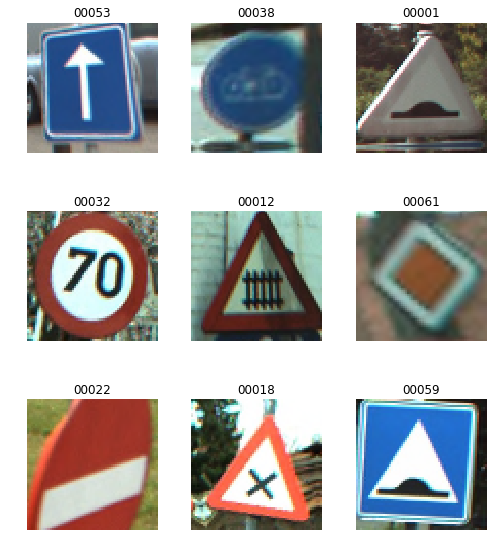

In [7]:
data.show_batch(rows=3, figsize=(7, 8))

number of images in training and validation set

In [8]:
len(data.train_ds), len(data.valid_ds)

(4575, 2520)

number of clases

In [9]:
data.c

62

## Train model

In [10]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


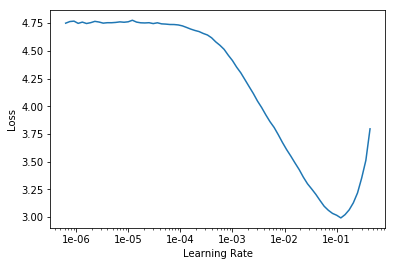

In [12]:
learn.recorder.plot()

In [13]:
lr = 1e-2

In [14]:
learn.fit_one_cycle(10, slice(lr))

Total time: 00:49
epoch  train_loss  valid_loss  error_rate
1      1.450979    0.853261    0.246825    (00:05)
2      0.689078    0.434062    0.132936    (00:04)
3      0.510877    0.392140    0.104762    (00:04)
4      0.393151    0.255618    0.065873    (00:04)
5      0.345307    0.203937    0.050794    (00:04)
6      0.230169    0.217577    0.053175    (00:04)
7      0.170776    0.121075    0.030952    (00:04)
8      0.108037    0.148314    0.040873    (00:04)
9      0.084011    0.136140    0.033730    (00:04)
10     0.071694    0.135505    0.033333    (00:04)



In [15]:
learn.save('stage-one')

### fine tuning

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


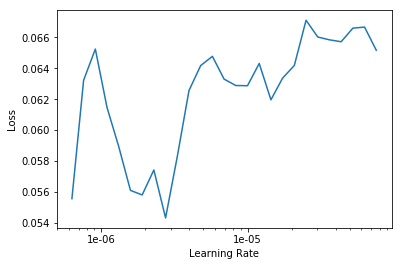

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(10, slice(1e-6, lr/5))

Total time: 00:59
epoch  train_loss  valid_loss  error_rate
1      0.088754    0.149398    0.039286    (00:06)
2      0.081976    0.137315    0.033730    (00:05)
3      0.082509    0.128088    0.028571    (00:05)
4      0.096832    0.140960    0.032143    (00:05)
5      0.079810    0.133228    0.029762    (00:05)
6      0.060006    0.118147    0.028175    (00:05)
7      0.039978    0.138044    0.027778    (00:05)
8      0.038420    0.126459    0.028175    (00:05)
9      0.032808    0.118249    0.024603    (00:05)
10     0.029179    0.124303    0.025397    (00:05)



In [21]:
learn.save('stage-two')

## Increase image size

In [22]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=128, bs=32).normalize(imagenet_stats)

In [ ]:
learn.load('stage2-new')

In [23]:
learn.data = data

In [24]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


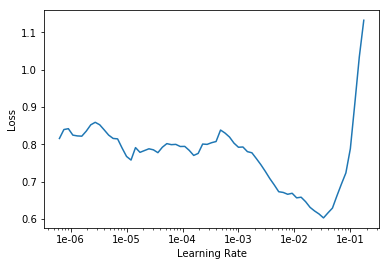

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
lr=1e-2/2

In [27]:
learn.fit_one_cycle(10, slice(lr))

Total time: 01:48
epoch  train_loss  valid_loss  error_rate
1      0.279949    0.180023    0.048810    (00:12)
2      0.148736    0.141441    0.037302    (00:10)
3      0.156599    0.177328    0.048016    (00:10)
4      0.164623    0.142830    0.034524    (00:10)
5      0.126352    0.146944    0.034524    (00:10)
6      0.097311    0.116993    0.022619    (00:10)
7      0.084680    0.135064    0.028571    (00:10)
8      0.047306    0.117040    0.023016    (00:11)
9      0.033965    0.101596    0.020238    (00:10)
10     0.033857    0.105190    0.021429    (00:10)



In [28]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


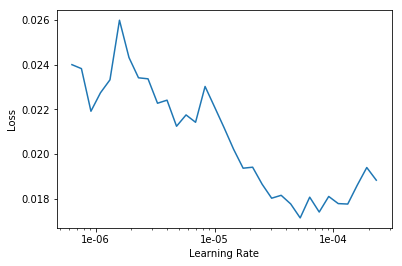

In [29]:
learn.lr_find()
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(10, slice(1e-5, lr/5))

Total time: 02:20
epoch  train_loss  valid_loss  error_rate
1      0.037965    0.159038    0.029365    (00:14)
2      0.094161    0.373884    0.073016    (00:13)
3      0.128401    0.186202    0.036508    (00:13)
4      0.114069    0.166657    0.039286    (00:14)
5      0.072035    0.128920    0.026190    (00:14)
6      0.060772    0.124907    0.025397    (00:14)
7      0.030929    0.117385    0.023413    (00:13)
8      0.023634    0.094518    0.017460    (00:13)
9      0.019655    0.107376    0.021825    (00:14)
10     0.012100    0.105135    0.019048    (00:13)



In [31]:
learn.save('final-one')

## Interpretation

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

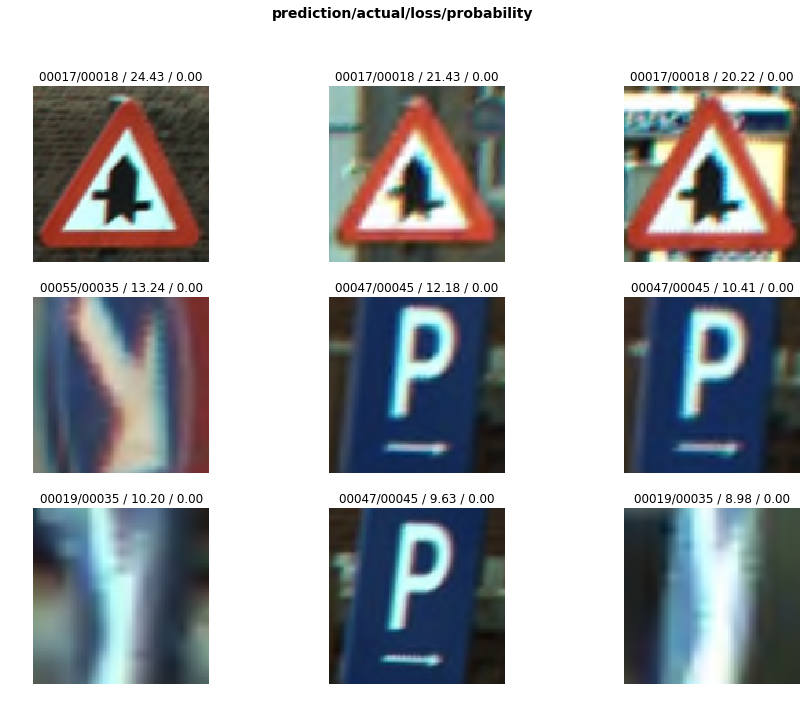

In [33]:
interp.plot_top_losses(9, figsize=(15, 11))

In [34]:
interp.most_confused()

[('00004', '00003', 9),
 ('00045', '00047', 7),
 ('00018', '00017', 3),
 ('00006', '00005', 3),
 ('00005', '00006', 3),
 ('00045', '00049', 3),
 ('00046', '00045', 2),
 ('00035', '00055', 2),
 ('00035', '00019', 2),
 ('00021', '00019', 2)]

### actual sign names

In [ ]:
actual_sign_names = {'00000': 'Bumpy road (about 150m after the sign)', '00001': 'Speed bump (about 150m after the sign)'
    '00000': 'Bumpy road (about 150m after the sign)',